# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [59]:
#import relevent libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier

#load data into data frame
df = pd.read_csv('/content/ExtraaLearn.csv')


## Data Overview

- Observations
- Sanity checks

In [60]:
data_shape = df.shape
data_info = df.info()
null_values = df.isnull().sum()

data_shape, data_info, null_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

((4612, 15),
 None,
 ID                       0
 age                      0
 current_occupation       0
 first_interaction        0
 profile_completed        0
 website_visits           0
 time_spent_on_website    0
 page_views_per_visit     0
 last_activity            0
 print_media_type1        0
 print_media_type2        0
 digital_media            0
 educational_channels     0
 referral                 0
 status                   0
 dtype: int64)

In [61]:
#show standard stats about data
stats = df.describe(include='all')
#check unique values
unique_vals = df.nunique()

#check unique IDs
unique_IDs = df['ID'].nunique() == data_shape[0]

dist_status = df['status'].value_counts(normalize=True)

stats, unique_vals, unique_IDs, dist_status

(            ID          age current_occupation first_interaction  \
 count     4612  4612.000000               4612              4612   
 unique    4612          NaN                  3                 2   
 top     EXT001          NaN       Professional           Website   
 freq         1          NaN               2616              2542   
 mean       NaN    46.201214                NaN               NaN   
 std        NaN    13.161454                NaN               NaN   
 min        NaN    18.000000                NaN               NaN   
 25%        NaN    36.000000                NaN               NaN   
 50%        NaN    51.000000                NaN               NaN   
 75%        NaN    57.000000                NaN               NaN   
 max        NaN    63.000000                NaN               NaN   
 
        profile_completed  website_visits  time_spent_on_website  \
 count               4612     4612.000000            4612.000000   
 unique                 3         

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

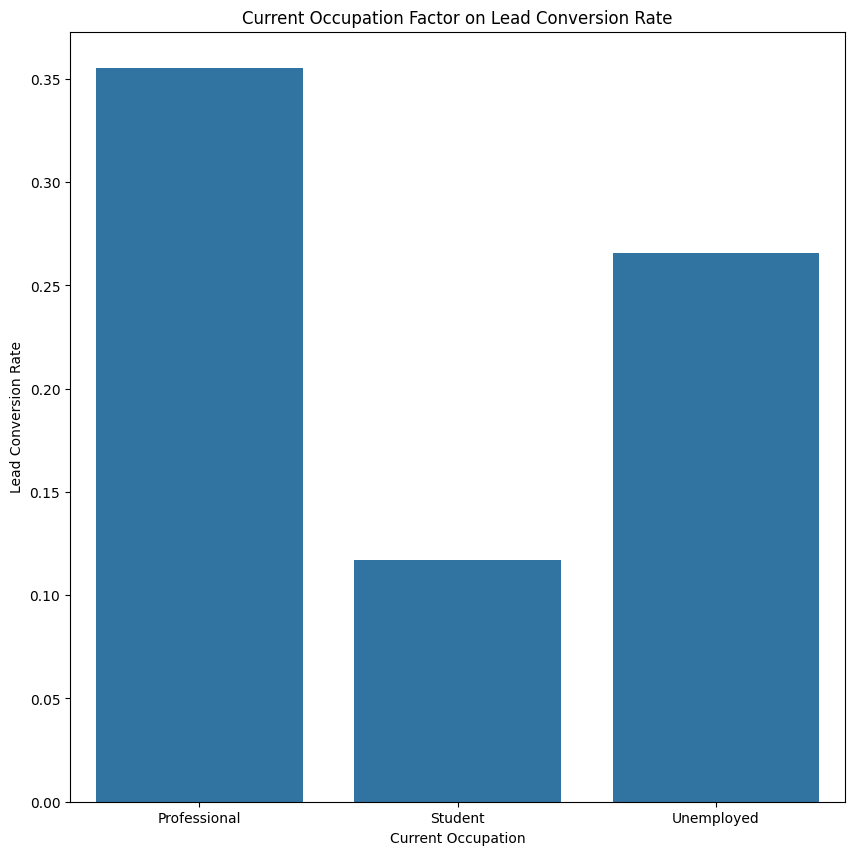

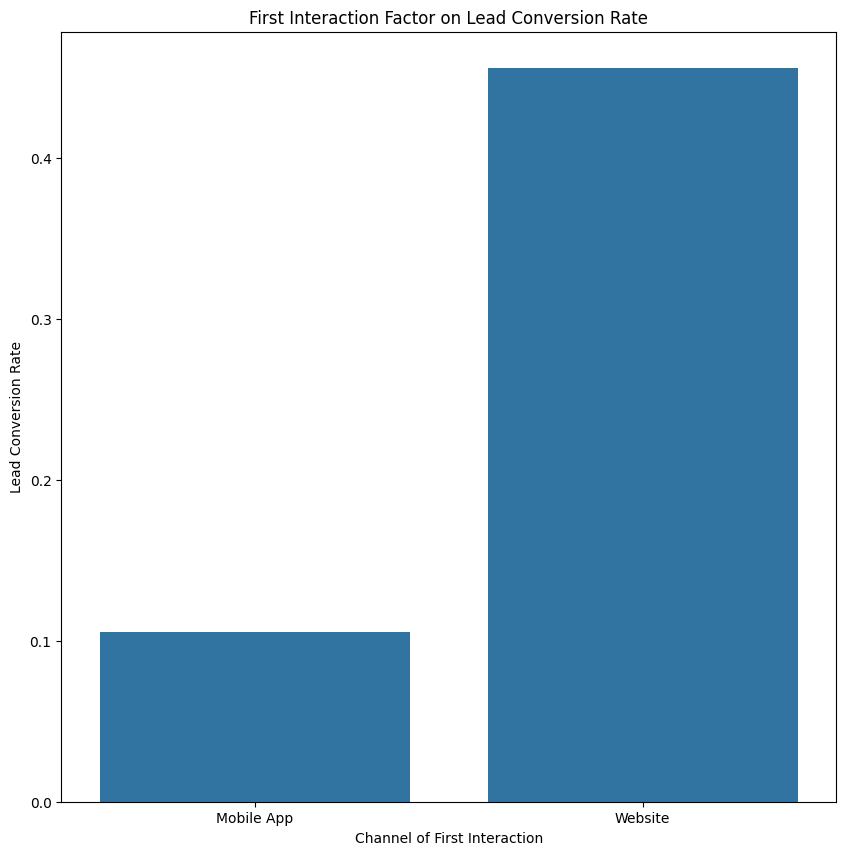

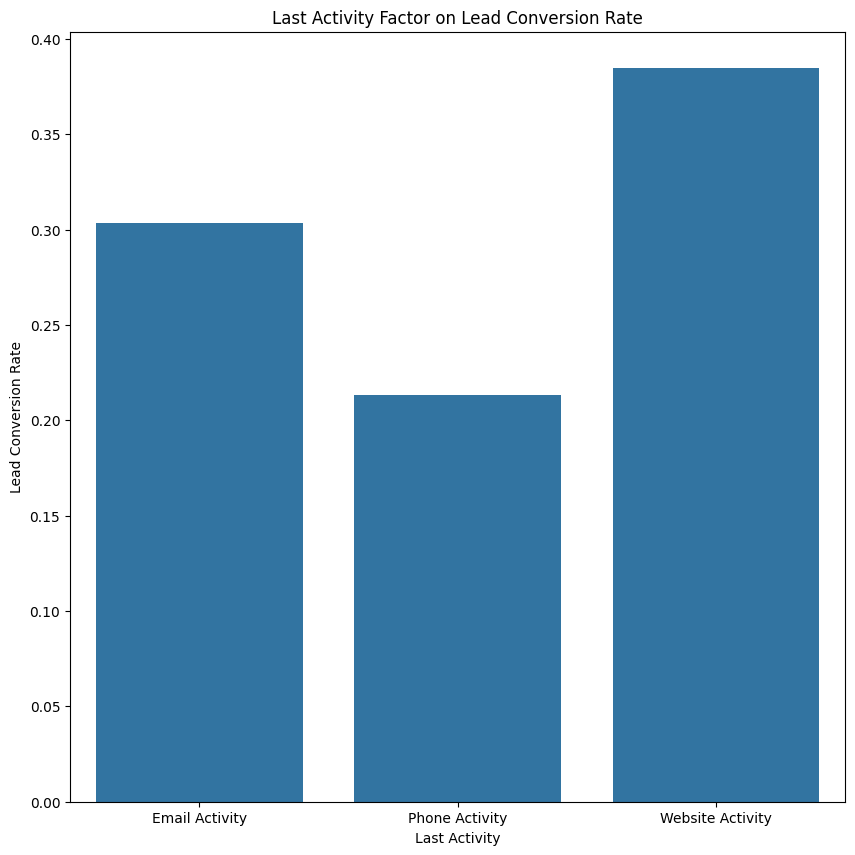

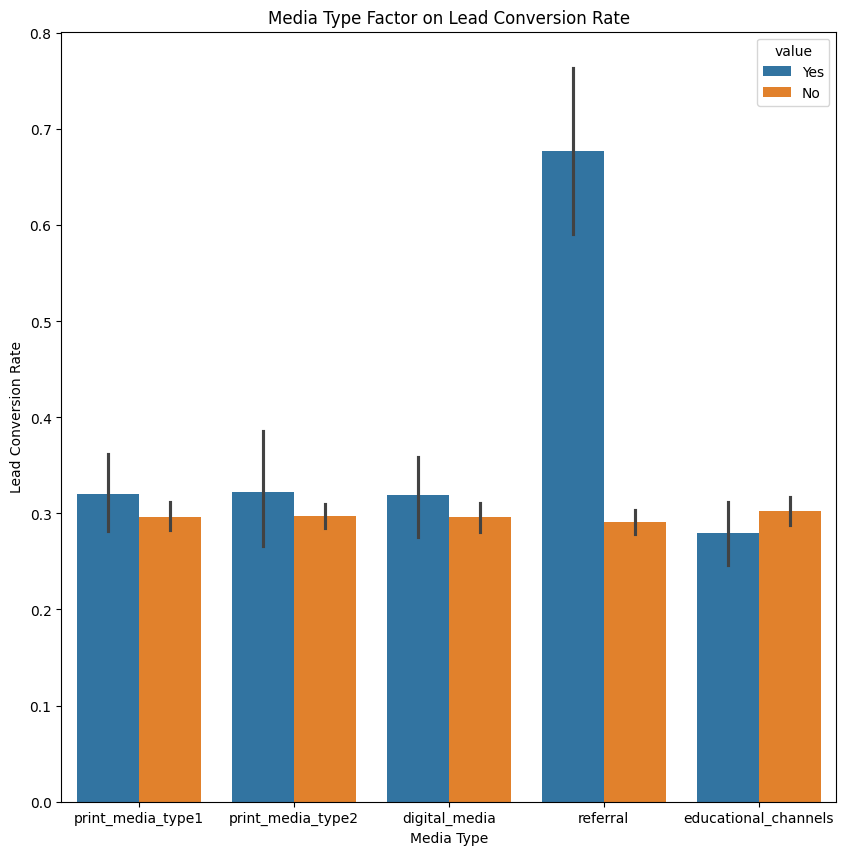

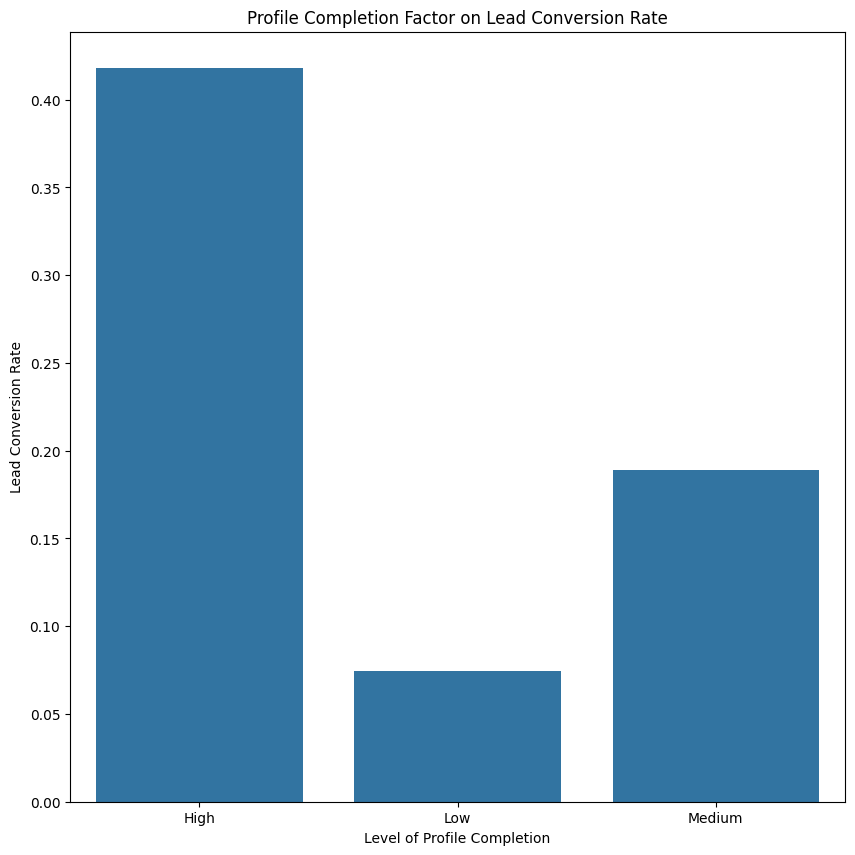

In [62]:
#Q1
occupation_factor = df.groupby('current_occupation' )['status'].mean()

plt.figure(figsize=(10, 10))
sns.barplot(x=occupation_factor.index, y=occupation_factor.values)

plt.title('Current Occupation Factor on Lead Conversion Rate')
plt.xlabel('Current Occupation')
plt. ylabel('Lead Conversion Rate')
plt. show()

#Q2
first_interaction_factor = df.groupby('first_interaction')['status'].mean()

plt.figure(figsize=(10, 10))
sns.barplot(x=first_interaction_factor.index, y=first_interaction_factor.values)

plt.title('First Interaction Factor on Lead Conversion Rate')
plt.xlabel('Channel of First Interaction')
plt. ylabel('Lead Conversion Rate')
plt. show()

#Q3
interaction_type_factor = df.groupby('last_activity')['status'].mean()

plt.figure(figsize=(10, 10))
sns.barplot(x=interaction_type_factor.index, y=interaction_type_factor.values)

plt.title('Last Activity Factor on Lead Conversion Rate')
plt.xlabel('Last Activity')
plt. ylabel('Lead Conversion Rate')
plt. show()

#Q4
#channel_types = df.groupby('print_media_type1', 'print_media_type2', 'digital_media', 'referral', 'educational_channels')
channel_types = ['print_media_type1', 'print_media_type2', 'digital_media', 'referral', 'educational_channels']
channel_types_factor = df[channel_types + ['status']].groupby(channel_types).mean().reset_index()

new_df = df.melt(id_vars = 'status', value_vars = channel_types)

plt.figure(figsize = (10,10))
sns.barplot(x = 'variable', y = 'status', hue = 'value', data = new_df, estimator = np.mean)

plt.title('Media Type Factor on Lead Conversion Rate')
plt.xlabel('Media Type')
plt. ylabel('Lead Conversion Rate')
plt. show()

#Q5
profile_info_factor = df.groupby('profile_completed')['status'].mean()

plt.figure(figsize=(10, 10))
sns.barplot(x=profile_info_factor.index, y=profile_info_factor.values)

plt.title('Profile Completion Factor on Lead Conversion Rate')
plt.xlabel('Level of Profile Completion')
plt. ylabel('Lead Conversion Rate')
plt. show()

ANSWER:
1. People who work as professionals tend to have a higher lead conversion than the other occupations.

2. The first channels of interaction do have an impact on lead status as people who initially interacted with the website showed a higher conversion rate than thoose who used the mobile application.

3. The phone interactions appear to work best as they show a higher conversion rate.

4. Referral and digitial media have the highest lead conversion rate relativve to print.

5. Yes, having more details of a prospect tends lead to a higher conversion rate.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [63]:
#feature engineering =>
non_numerical_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

labels = {}
for col in non_numerical_cols:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])
  labels[col] = label_encoder

#resolve outlier data
numerical_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

def resolve_outliers(col):
  first_quartile = df[col].quantile(0.25)
  third_quartile = df[col].quantile(0.75)
  interquartile_range = third_quartile - first_quartile

  low_bound = first_quartile - 1.5 * interquartile_range
  top_bound = third_quartile + 1.5 * interquartile_range

  df[col] = np.where(df[col] < low_bound, low_bound, df[col])
  df[col] = np.where(df[col] > top_bound, top_bound, df[col])

for col in numerical_cols:
  resolve_outliers(col)

#prep => split datafrane into the features and the target
features = df.drop(columns = ['ID', 'status'])
target = df['status']

scale_numerals = StandardScaler()
features[numerical_cols] = scale_numerals.fit_transform(features[numerical_cols])

features.head(), target.head()


(        age  current_occupation  first_interaction  profile_completed  \
 0  0.820575                   2                  1                  0   
 1  0.744587                   0                  0                  2   
 2  0.440636                   0                  1                  2   
 3  0.516624                   2                  1                  0   
 4 -1.763007                   1                  1                  0   
 
    website_visits  time_spent_on_website  page_views_per_visit  last_activity  \
 0        1.483739               1.230240             -0.635933              2   
 1       -0.605983              -0.861866             -1.565375              2   
 2       -0.188039              -0.529764             -1.713748              2   
 3        0.229906              -0.349596             -0.517717              2   
 4        0.229906              -0.166738              2.025734              0   
 
    print_media_type1  print_media_type2  digital_media  edu

## EDA

- It is a good idea to explore the data once again after manipulating it.

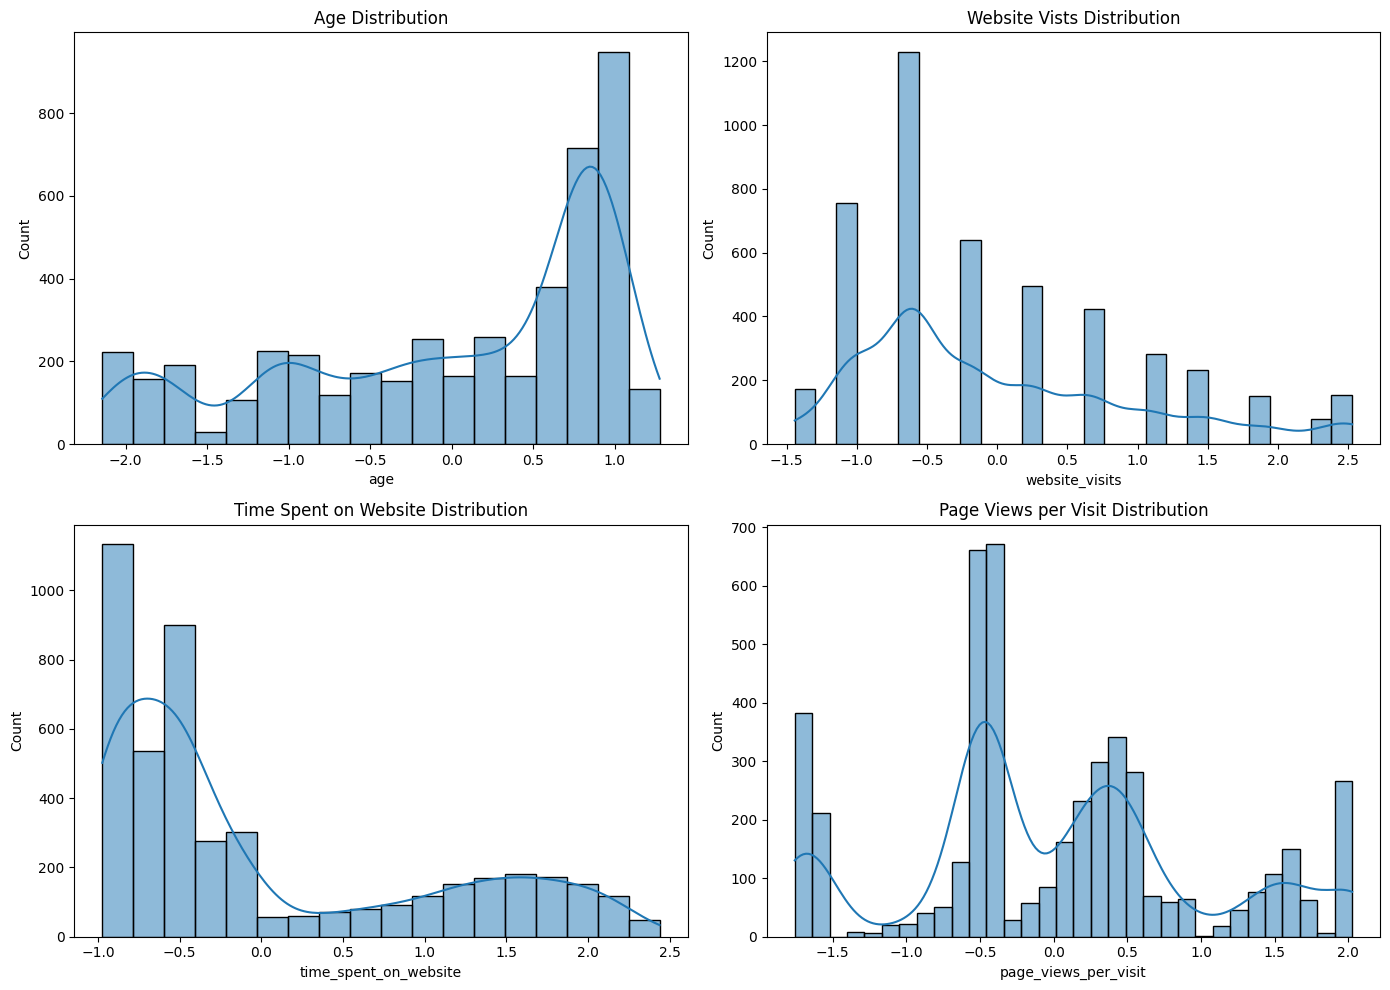

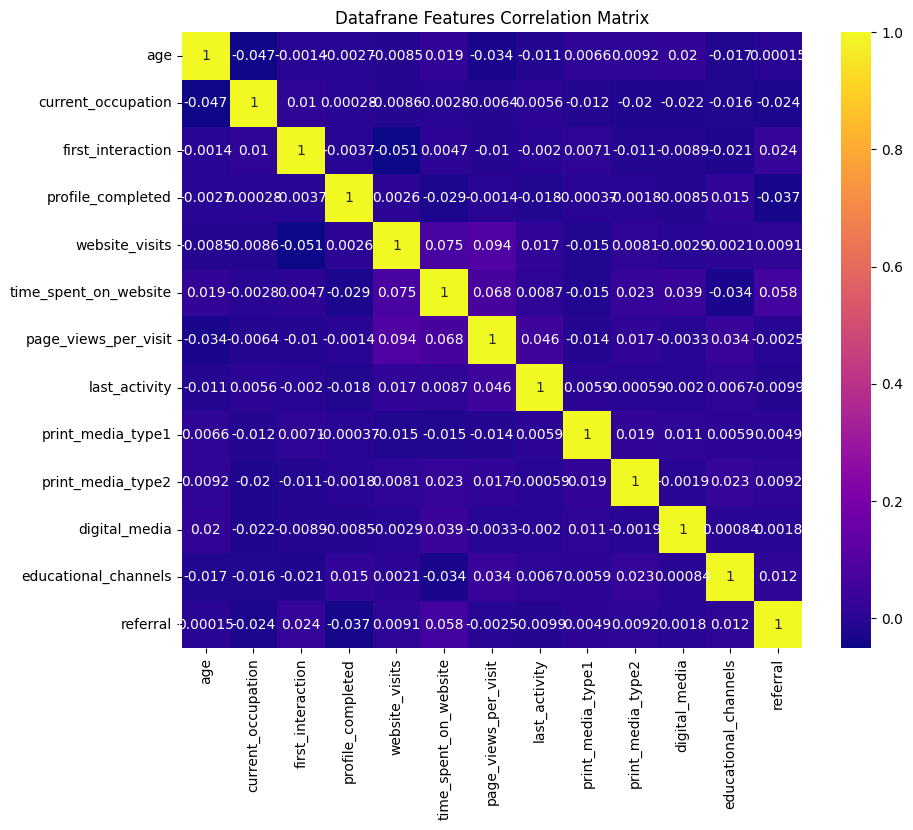

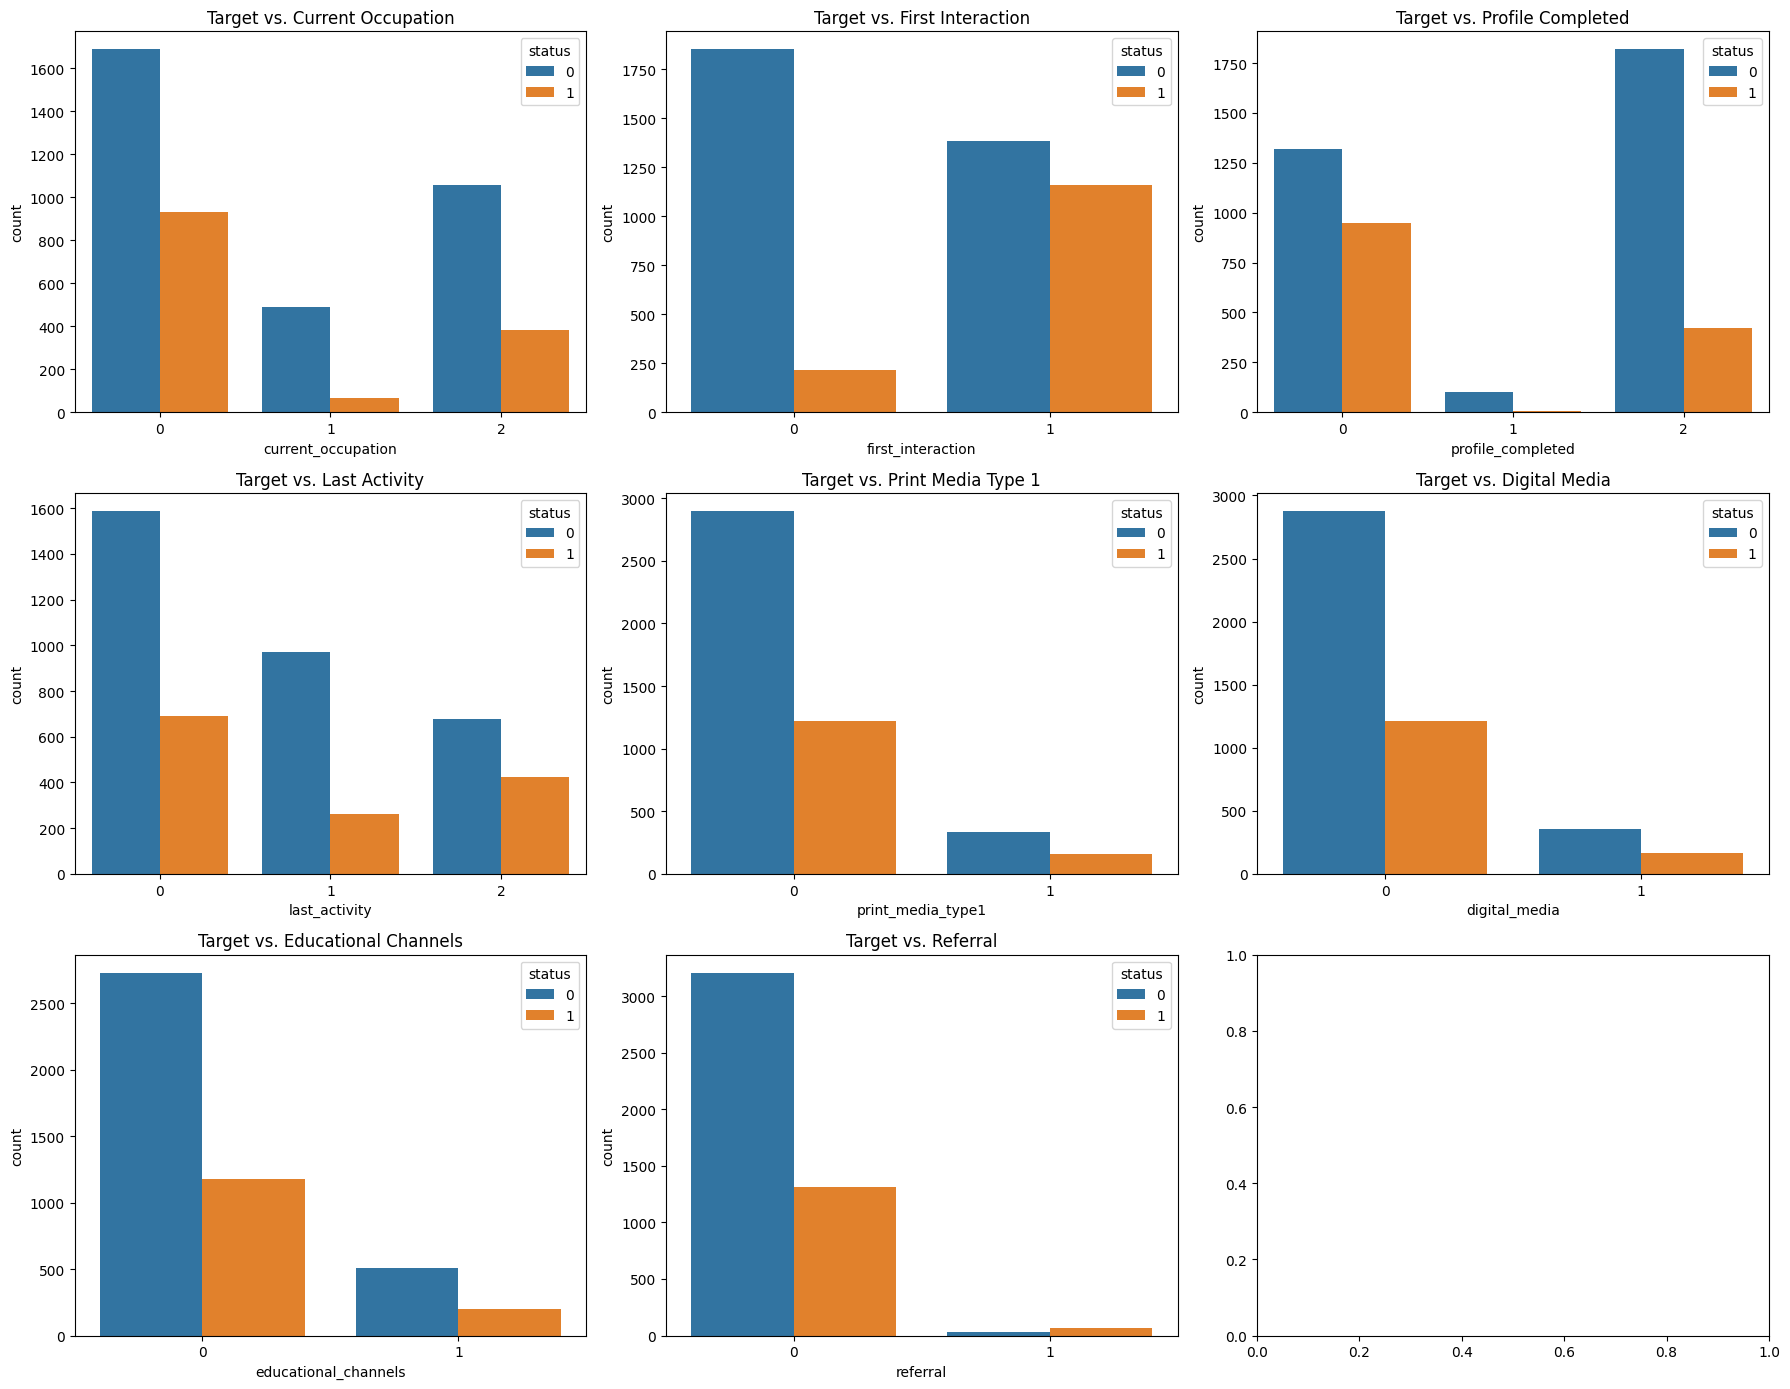

In [64]:
# numerical value distribution
figure, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(features['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(features['website_visits'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Website Vists Distribution')

sns.histplot(features['time_spent_on_website'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Time Spent on Website Distribution')

sns.histplot(features['page_views_per_visit'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Page Views per Visit Distribution')

plt.tight_layout()
plt.show

#correlation analysis
plt.figure(figsize=(10, 8))
corr_matrix = features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title("Datafrane Features Correlation Matrix")
plt.show()

#EDA of categorical values
figure, axes = plt.subplots(3, 3, figsize=(18, 14))

sns.countplot(x=features['current_occupation'], hue=target, ax=axes[0, 0])
axes[0,0].set_title('Target vs. Current Occupation')


sns.countplot(x=features['first_interaction'], hue=target, ax=axes[0, 1])
axes[0,1].set_title('Target vs. First Interaction')


sns.countplot(x=features['profile_completed'], hue=target, ax=axes[0, 2])
axes[0,2].set_title('Target vs. Profile Completed')


sns.countplot(x=features['last_activity'], hue=target, ax=axes[1, 0])
axes[1,0].set_title('Target vs. Last Activity')


sns.countplot(x=features['print_media_type1'], hue=target, ax=axes[1, 1])
axes[1,1].set_title('Target vs. Print Media Type 1')


sns.countplot(x=features['digital_media'], hue=target, ax=axes[1, 2])
axes[1,2].set_title('Target vs. Digital Media')


sns.countplot(x=features['educational_channels'], hue=target, ax=axes[2, 0])
axes[2,0].set_title('Target vs. Educational Channels')


sns.countplot(x=features['referral'], hue=target, ax=axes[2, 1])
axes[2,1].set_title('Target vs. Referral')

plt.tight_layout()
plt.show()

## Building a Decision Tree model

In [65]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=40)

tree_mod = DecisionTreeClassifier(random_state = 40)
tree_mod.fit(features_train, target_train)

target_prediction = tree_mod.predict(features_test)

model_accuracy = accuracy_score(target_test, target_prediction)
matrix = confusion_matrix(target_test, target_prediction)
results = classification_report(target_test, target_prediction)

model_accuracy, matrix, results

(0.8200867052023122,
 array([[872, 152],
        [ 97, 263]]),
 '              precision    recall  f1-score   support\n\n           0       0.90      0.85      0.88      1024\n           1       0.63      0.73      0.68       360\n\n    accuracy                           0.82      1384\n   macro avg       0.77      0.79      0.78      1384\nweighted avg       0.83      0.82      0.82      1384\n')

## Do we need to prune the tree?

ANSWER: This model has an accuracy of about 82% which is generally good. According to the resulting confusion matrix, the calculation of the non-converted leads (Class 0: TN and FP) has a precision of about 90%, a recall of 85%, and an F1-Score of 88%. The calculation of the converted leads (Class 1: TP and FN) has a precision of about 63%, a recall of 73%, and an F1-Score of 68%. Therefore, the model was relatively accurate at calculating the leads that didn't convert, but still needs significant improvement on estimating the converted leads. Therefore, we should prune the tree by setting a max depth to try to improve the model's performance whilst avoiding overfitting.

In [66]:
tree_max_depth = 5

prun_tree_mod = DecisionTreeClassifier(random_state = 40, max_depth = tree_max_depth)
prun_tree_mod.fit(features_train, target_train)

prun_target_prediction = tree_mod.predict(features_test)

prun_model_accuracy = accuracy_score(target_test, prun_target_prediction)
prun_matrix = confusion_matrix(target_test, prun_target_prediction)
prun_results = classification_report(target_test, prun_target_prediction)

prun_model_accuracy, prun_matrix, prun_results

(0.8200867052023122,
 array([[872, 152],
        [ 97, 263]]),
 '              precision    recall  f1-score   support\n\n           0       0.90      0.85      0.88      1024\n           1       0.63      0.73      0.68       360\n\n    accuracy                           0.82      1384\n   macro avg       0.77      0.79      0.78      1384\nweighted avg       0.83      0.82      0.82      1384\n')

## Building a Random Forest model

In [67]:
forest_mod = RandomForestClassifier(n_estimators=100, random_state=40)
forest_mod.fit(features_train, target_train)

forest_target_predicition = forest_mod.predict(features_test)

forest_acc = accuracy_score(target_test, forest_target_predicition)
forest_matrix = confusion_matrix(target_test, forest_target_predicition)
forest_result = classification_report(target_test, forest_target_predicition)

forest_acc, forest_matrix, forest_result

(0.8786127167630058,
 array([[947,  77],
        [ 91, 269]]),
 '              precision    recall  f1-score   support\n\n           0       0.91      0.92      0.92      1024\n           1       0.78      0.75      0.76       360\n\n    accuracy                           0.88      1384\n   macro avg       0.84      0.84      0.84      1384\nweighted avg       0.88      0.88      0.88      1384\n')

## Do we need to prune the tree?

ANSWER: This Random Forest model has an accuracy of about 87.86% which is slightly higher than that of the decision tree. According to the resulting confusion matrix, the calculation of the non-converted leads (Class 0: TN and FP) has a precision of about 92%, a recall of 91%, and an F1-Score of 91%. The calculation of the converted leads (Class 1: TP and FN) has a precision of about 75%, a recall of 78%, and an F1-Score of 76%. Therefore, the model was relatively accurate at calculating the leads that didn't convert, but could still improve more on the converted leads. Instead of pruning the tree, it would be a better decision to tune paramters like the number of estimators and the depth to address overfitting.

## Actionable Insights and Recommendations

ANSWER: Based on the information and analysis gathered from our decision tree models, we have learned about the factors that contribute to the conversion of leads. In terms of ocupation, people who are working professionals tend to have a higher conversion rate relative to others so ExtraaLearn should focus it's marketing more on this demographic of people. We also can see that there was a higher conversion rate amongst individuals who first interacted with the company services through the website so it would be reasonable to invest in promoting and incentivizing the website in order to attract more leads for conversion through the introduction of discounts, an efficient and attractive user interface, a product support center, etc.

Furthermore, the data also shows that there are many leads that convert that have had phone interactions with the company. ExtraaLearn should take this into consideration and work to maintain frequent, customer-tailored, and quality phone calls. In terms of the marketing strategy, the company should also focus more on referrals, digital media, and educational platforms as they have a greater conversion rate compared to print or text forms.

Lastly, it is critical to monitor and analyze the degree of a customers' profile completetion as it appears to indicate how invested the person is in the company's product. The data shows that people who have more of their user profile complete tend to convert more so incentivizing and encouraging more detailied profile completetion could yield a higher number of new customers for the company.